## MARKETING CAMPAIGN

## **Objective**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

## **Data Description**
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
 Teenhome - number of teenagers in customer’s household
 Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - amount spent on wine products in the last 2 years
MntGoldProds - amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalogue
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase


## **Inspiration**
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

### Import Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Uploading Data

In [2]:
data=pd.read_excel("Downloads/marketing_campaign.xlsx")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Shape of Data

In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# EDA

##  Pie Chart corresponding to the Response



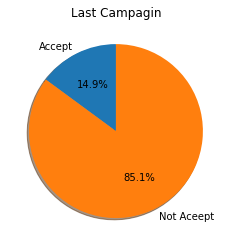

In [5]:
label = 'Accept','Not Aceept'
plt.pie([len(data['Response'][data['Response']==1]),len(data['Response'][data['Response']==0])],labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Last Campagin');

##  Bar Plot of the education level

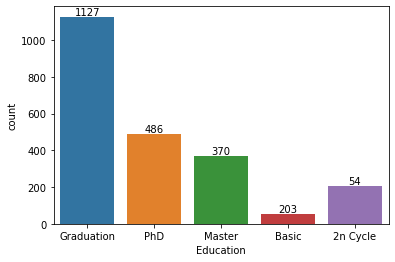

In [6]:
import seaborn as sns

ax = sns.countplot(x = 'Education',data = data)
abs_values = data['Education'].sort_values(ascending = False).value_counts(ascending=False).values

s = ax.bar_label(container=ax.containers[0], labels=abs_values)

## Bar Plot of the marital status

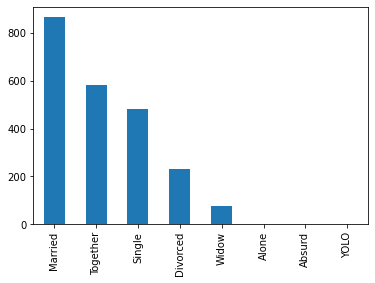

In [7]:
data['Marital_Status'].value_counts().plot(kind="bar")

plt.show()

##  Bar plot for analyzing the last campaign

C:\Users\Shivam\AppData\Local\Temp/ipykernel_1184/3714205080.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 5))


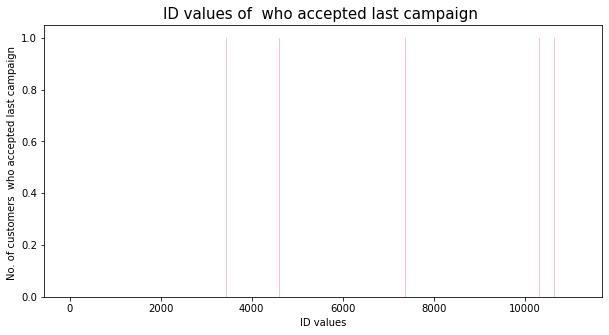

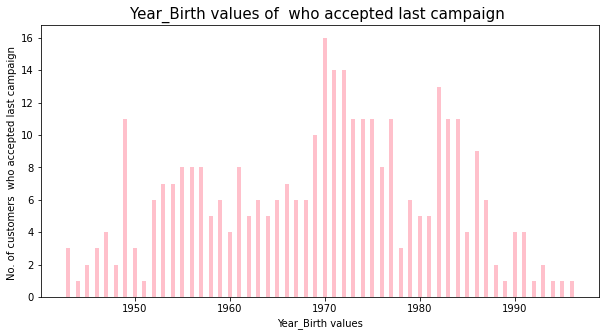

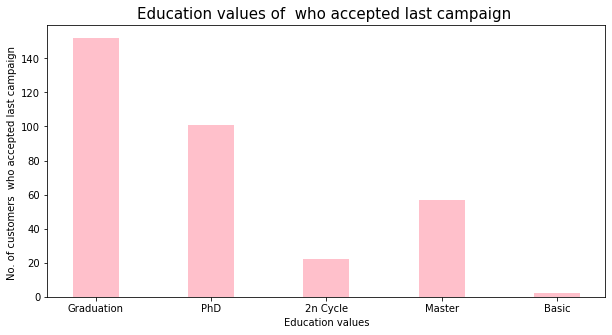

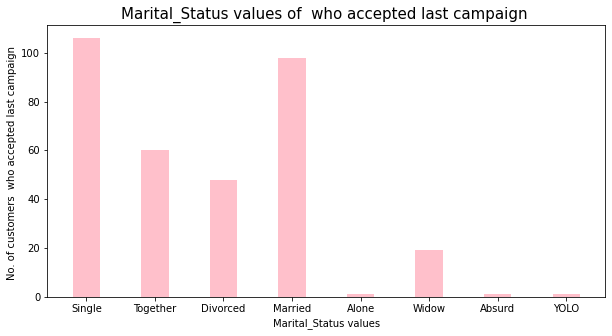

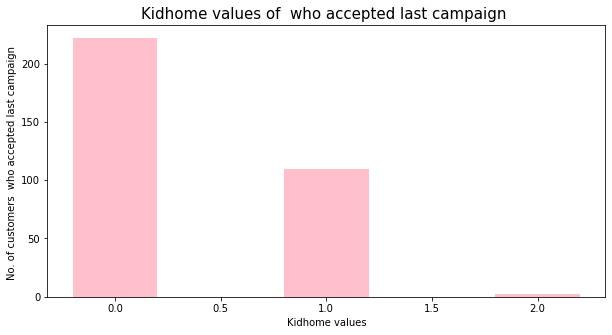

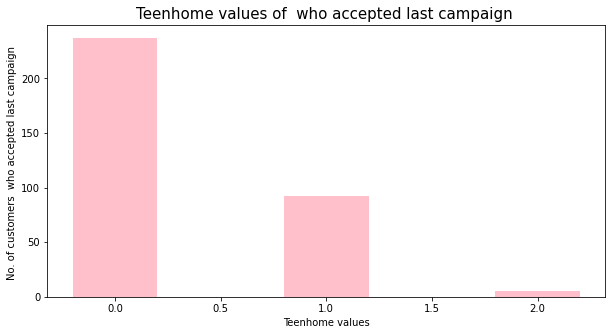

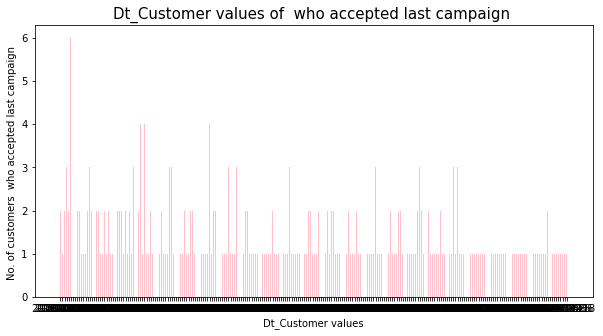

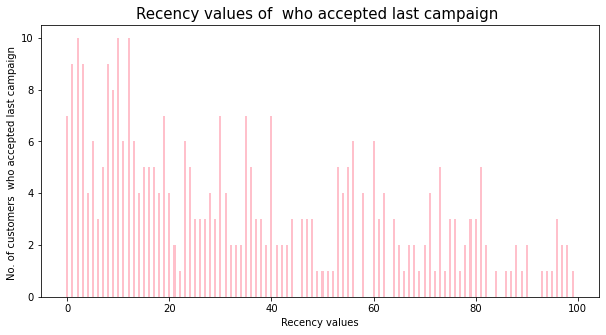

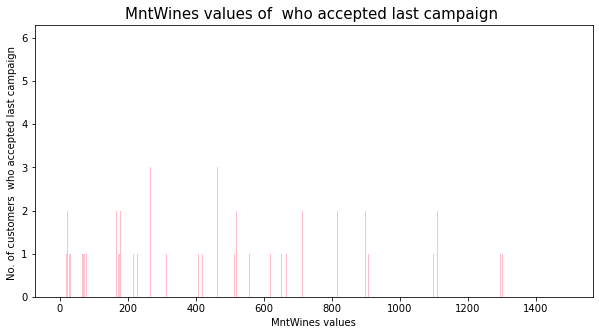

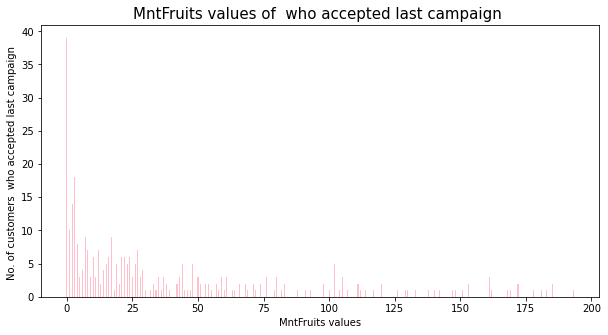

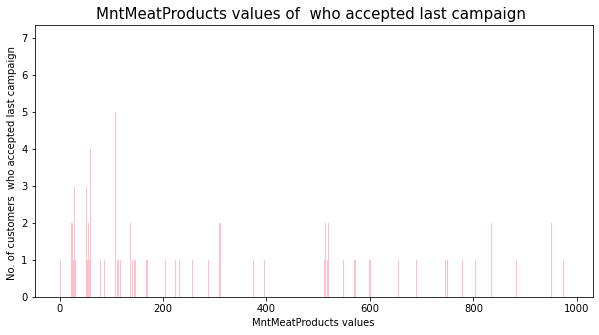

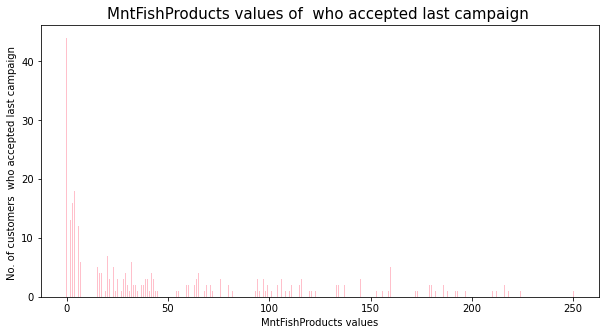

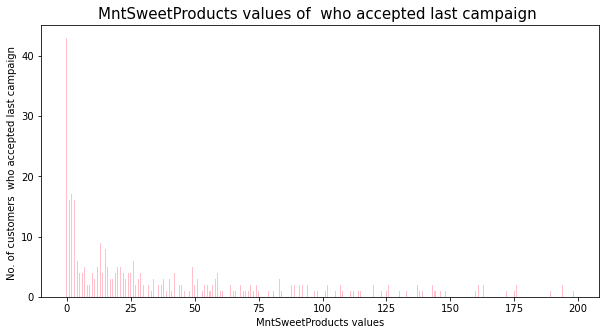

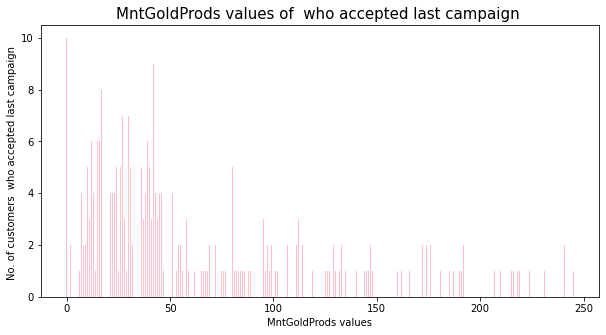

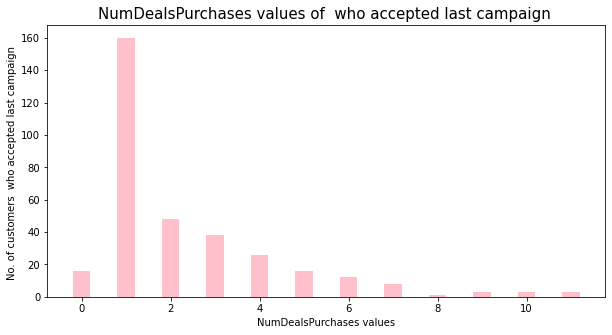

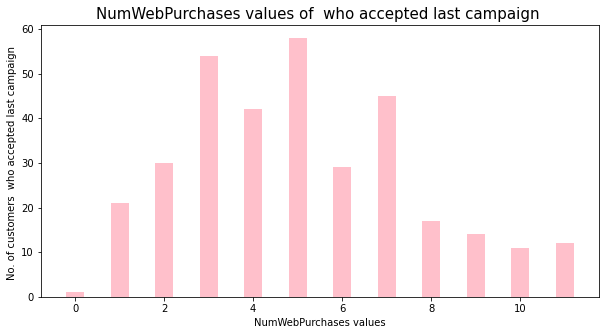

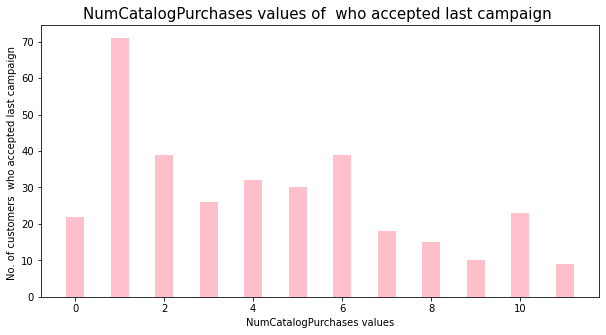

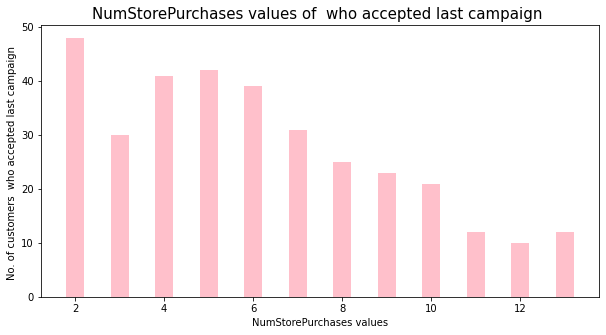

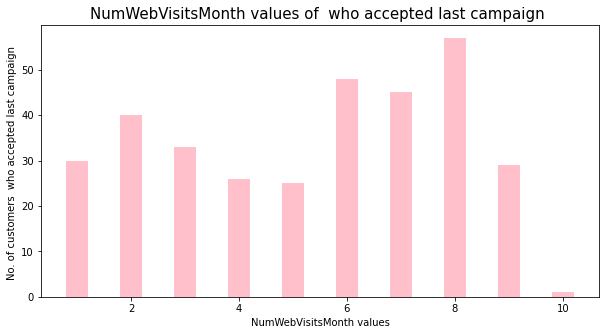

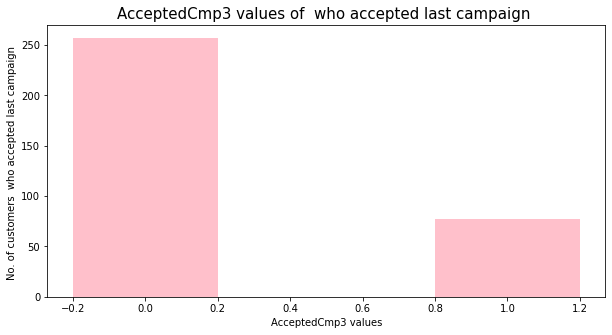

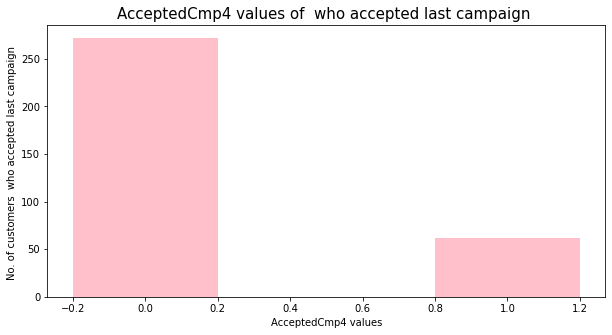

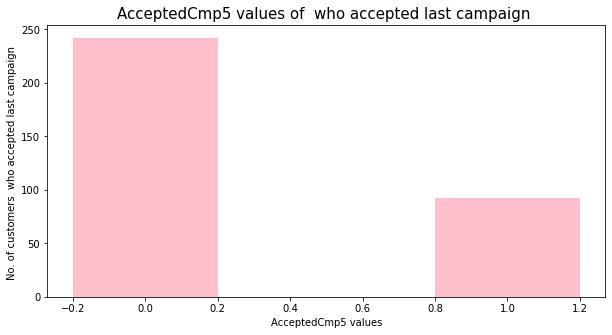

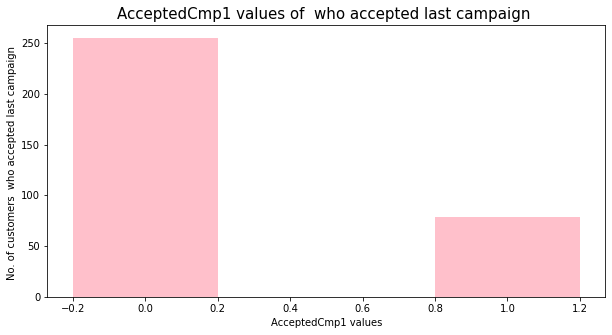

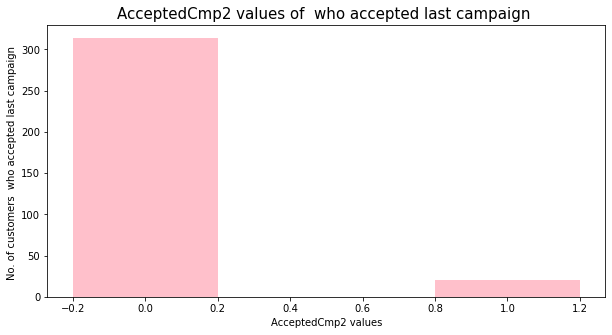

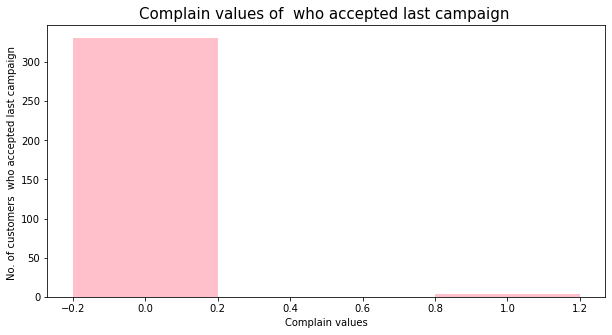

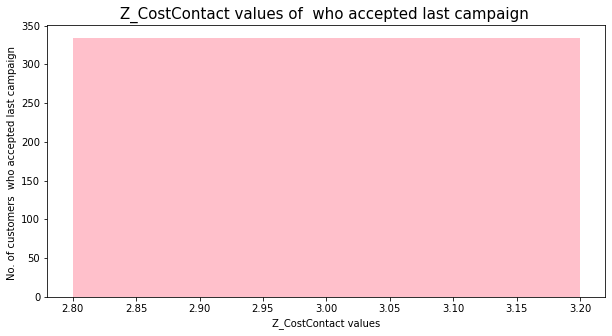

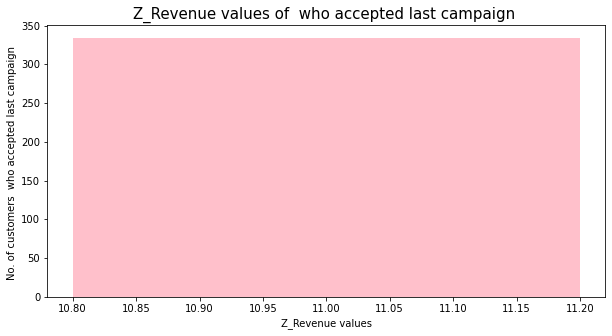

In [8]:
for _ in data.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in data[data['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(data[data['Response']==1][f'{_}'][data[data['Response']==1][f'{_}']==i]) for i in data[data['Response']==1][f'{_}'].unique()]

        plt.bar(uniqe_list, uniqe_values, color ='pink',width = 0.4)
        plt.xlabel(f"{_} values",fontsize=10)
        plt.ylabel("No. of customers  who accepted last campaign ",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15);

## Mean and mode of accept response 

In [9]:

for i in data.columns:
    if data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(data[i][data['Response']==1].mean()))
    else:
        print('type object:',i,'Mode:',data[i][data['Response']==1].mode()[0])

type int64: ID Mean: 5421
type int64: Year_Birth Mean: 1969
type object: Education Mode: Graduation
type object: Marital_Status Mode: Single
type object: Income Mode: 7500.0
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type object: Dt_Customer Mode: 2012-11-09
type int64: Recency Mean: 35
type int64: MntWines Mean: 502
type int64: MntFruits Mean: 38
type int64: MntMeatProducts Mean: 294
type int64: MntFishProducts Mean: 52
type int64: MntSweetProducts Mean: 38
type int64: MntGoldProds Mean: 61
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 5
type int64: NumCatalogPurchases Mean: 4
type int64: NumStorePurchases Mean: 6
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Complain Mean: 0
type int64: Z_CostContact Mean: 3
type int64: Z_Revenue Mean: 11
type int64: Response Mean: 1


### Mean and mode of don't accept response 

In [10]:

for i in data.columns:
    if data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(data[i][data['Response']==0].mean()))
    else:
        print('type object:',i,'Mode:',data[i][data['Response']==0].mode()[0])

type int64: ID Mean: 5622
type int64: Year_Birth Mean: 1968
type object: Education Mode: Graduation
type object: Marital_Status Mode: Married
type object: Income Mode: 7500.0
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type object: Dt_Customer Mode: 2012-08-31
type int64: Recency Mean: 51
type int64: MntWines Mean: 269
type int64: MntFruits Mean: 24
type int64: MntMeatProducts Mean: 144
type int64: MntFishProducts Mean: 34
type int64: MntSweetProducts Mean: 25
type int64: MntGoldProds Mean: 40
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 3
type int64: NumCatalogPurchases Mean: 2
type int64: NumStorePurchases Mean: 5
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Complain Mean: 0
type int64: Z_CostContact Mean: 3
type int64: Z_Revenue Mean: 11
type int64: Response Mean: 0


In [11]:
spent = [col for col in data if col.startswith('Mnt')]
spent

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [12]:
d= pd.DataFrame(data[spent].sum())
d

,0
MntWines,680816
MntFruits,58917
MntMeatProducts,373968
MntFishProducts,84057
MntSweetProducts,60621
MntGoldProds,98609


In [13]:
total_purchase = [col for col in data if col.startswith('Num')]
df_TP = data[total_purchase].sum()
df_TP1  = pd.DataFrame(df_TP)
df_TP1

,0
NumDealsPurchases,5208
NumWebPurchases,9150
NumCatalogPurchases,5963
NumStorePurchases,12970
NumWebVisitsMonth,11909


## Pie chart  for the number of purchases from the different layout

([<matplotlib.patches.Wedge at 0x1ed06e02af0>,
 [Text(1.0287179364575458, 0.3895374272268697, 'NumDealsPurchases'),
  Text(0.23024814568920865, 1.0756327400217423, 'NumWebPurchases'),
  Text(-0.8187710798158175, 0.734584180919546, 'NumCatalogPurchases'),
  Text(-1.084062661285548, -0.7175013215364106, 'NumStorePurchases'),
  Text(0.744207029289296, -0.8100345039295554, 'NumWebVisitsMonth')])

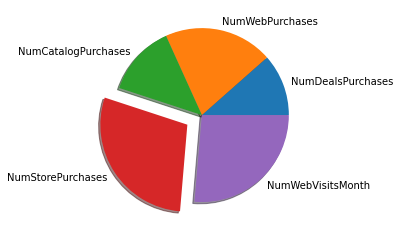

In [14]:
'''fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(x = df_TP.index, y = df_TP[0].sort_values(ascending=False))
plt.xticks(rotation=40)'''
myexplode = [0,0,0,0.2,0]
plt.pie(df_TP,labels=df_TP1.index,explode=myexplode, shadow=True)

### Plot representing Number of Purchases from different layout against Marital Status  

<AxesSubplot:xlabel='Marital_Status', ylabel='NumWebVisitsMonth'>

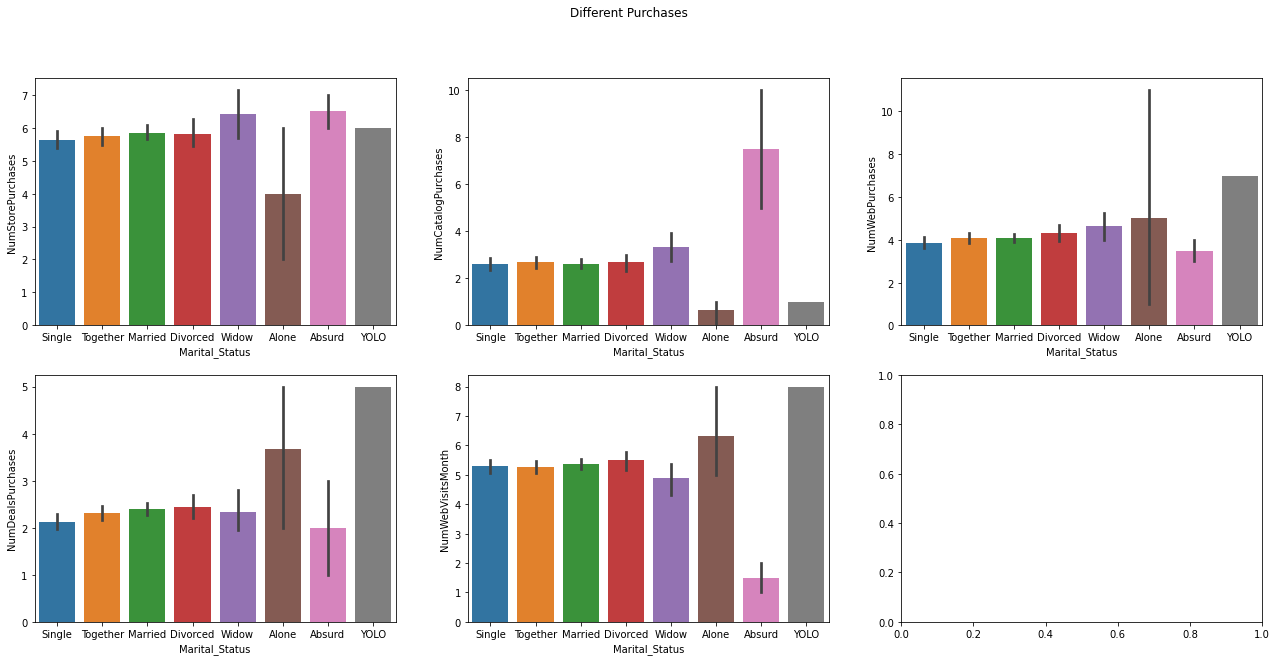

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3,figsize = (22,10))
fig.suptitle('Different Purchases')
sns.barplot(ax = axes[0,0],x=data['Marital_Status'],y = data['NumStorePurchases'])
#axes[0].set_title()
sns.barplot(ax = axes[0,1],x=data['Marital_Status'],y = data['NumCatalogPurchases'])

sns.barplot(ax = axes[0,2],x=data['Marital_Status'],y = data['NumWebPurchases'])

sns.barplot(ax = axes[1,0],x=data['Marital_Status'],y = data['NumDealsPurchases'])
sns.barplot(ax = axes[1,1],x=data['Marital_Status'],y = data['NumWebVisitsMonth'])

### Plot representing Number of Purchases from different layout against Educational level

<AxesSubplot:xlabel='Education', ylabel='NumWebVisitsMonth'>

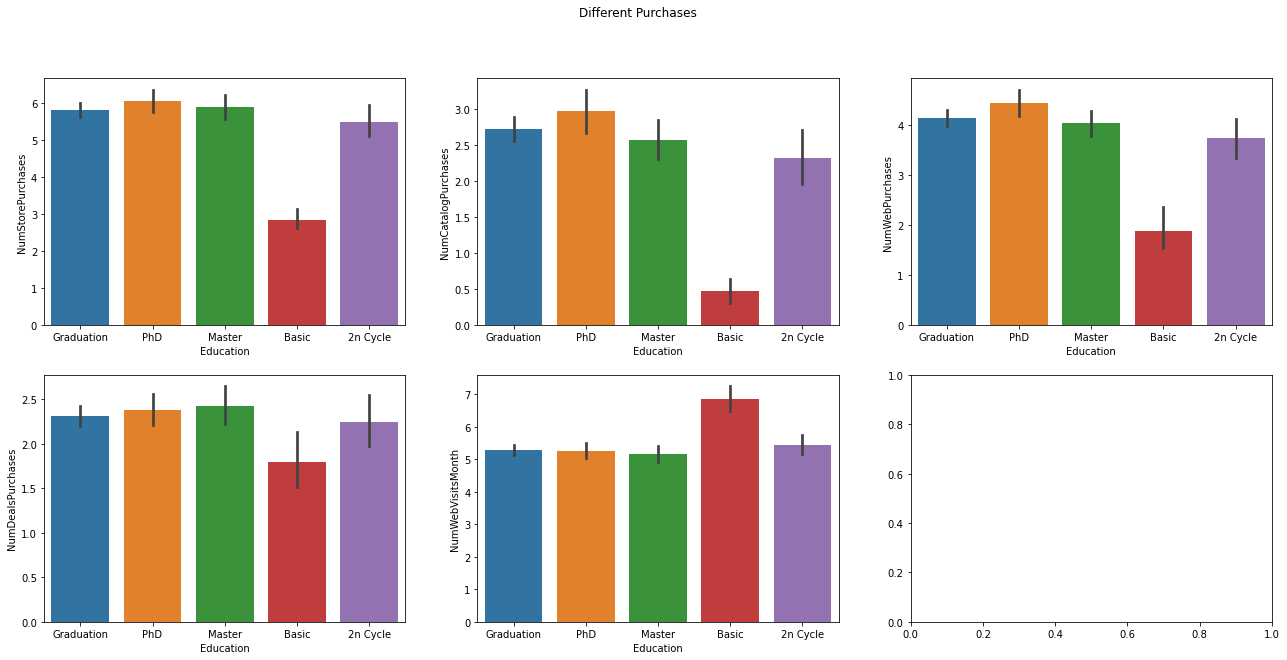

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3,figsize = (22,10))
fig.suptitle('Different Purchases')
sns.barplot(ax = axes[0,0],x=data['Education'],y = data['NumStorePurchases'])
#axes[0].set_title()
sns.barplot(ax = axes[0,1],x=data['Education'],y = data['NumCatalogPurchases'])

sns.barplot(ax = axes[0,2],x=data['Education'],y = data['NumWebPurchases'])

sns.barplot(ax = axes[1,0],x=data['Education'],y = data['NumDealsPurchases'])
sns.barplot(ax = axes[1,1],x=data['Education'],y = data['NumWebVisitsMonth'])

### Bar plot analyzing the success of  different campaigns 

<AxesSubplot:ylabel='0'>

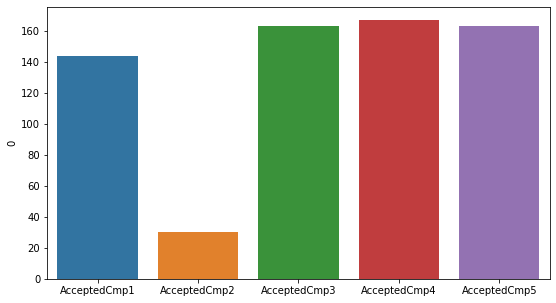

In [17]:
Cmp_tot = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum())
plt.figure(figsize=(9,5))
sns.barplot(x = Cmp_tot.index,y = Cmp_tot[0])

### Dropping some irrelevant columns

In [18]:
import pandas as pd
data.drop(columns = 'Dt_Customer',axis=1,inplace = True)
data.drop(columns = 'Year_Birth',axis=1,inplace = True)
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [19]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

## Data Encoding

In [20]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
data['Education']=label.fit_transform(data['Education'])


data
marital=pd.get_dummies(data['Marital_Status'],drop_first=True)
ndata=pd.concat([data.drop(columns=['Marital_Status']),marital],axis=1)
ndata.drop(columns = 'ID',inplace = True)
ndata

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,0,0,0,1,0,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,0,0,0,1,0,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,0,0,0,0,1,0,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,0,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,46,709,43,182,42,118,...,3,11,0,0,0,1,0,0,0,0
2236,4,64014.0,2,1,56,406,0,30,0,0,...,3,11,0,0,0,0,0,1,0,0
2237,2,56981.0,0,0,91,908,48,217,32,12,...,3,11,0,0,1,0,0,0,0,0
2238,3,69245.0,0,1,8,428,30,214,80,30,...,3,11,0,0,0,0,0,1,0,0


## Data Standarization

In [22]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int32  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [23]:
num_columns=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
            "NumDealsPurchases",'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'Teenhome']

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ndata[num_columns]=scaler.fit_transform(ndata[num_columns])

In [25]:
ndata.head()


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,0.234063,0,-0.929894,58,0.983781,1.551577,1.679702,2.462147,1.476500,...,3,11,1,0,0,0,1,0,0,0
1,2,-0.234559,1,0.906934,38,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,3,11,0,0,0,0,1,0,0,0
2,2,0.769478,0,-0.929894,26,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,3,11,0,0,0,0,0,1,0,0
3,2,-1.017239,1,-0.929894,26,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,3,11,0,0,0,0,0,1,0,0
4,4,0.240221,1,-0.929894,94,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,3,11,0,0,0,1,0,0,0,0


In [26]:
ndata.shape

(2240, 32)

## Missing Values


In [27]:
ndata.isnull().sum()

Education               0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Alone                   0
Divorced                0
Married                 0
Single                  0
Together                0
Widow                   0
YOLO                    0
dtype: int64

## Findings
**There are only 24 missing values in 'Income'.**

In [28]:
ndata.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,0.234063,0,-0.929894,58,0.983781,1.551577,1.679702,2.462147,1.476500,...,3,11,1,0,0,0,1,0,0,0
1,2,-0.234559,1,0.906934,38,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,3,11,0,0,0,0,1,0,0,0
2,2,0.769478,0,-0.929894,26,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,3,11,0,0,0,0,0,1,0,0
3,2,-1.017239,1,-0.929894,26,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,3,11,0,0,0,0,0,1,0,0
4,4,0.240221,1,-0.929894,94,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,3,11,0,0,0,1,0,0,0,0


## **Outlier Detection**

In [29]:
from matplotlib import pyplot as plt

###  Box plot for outlier detection

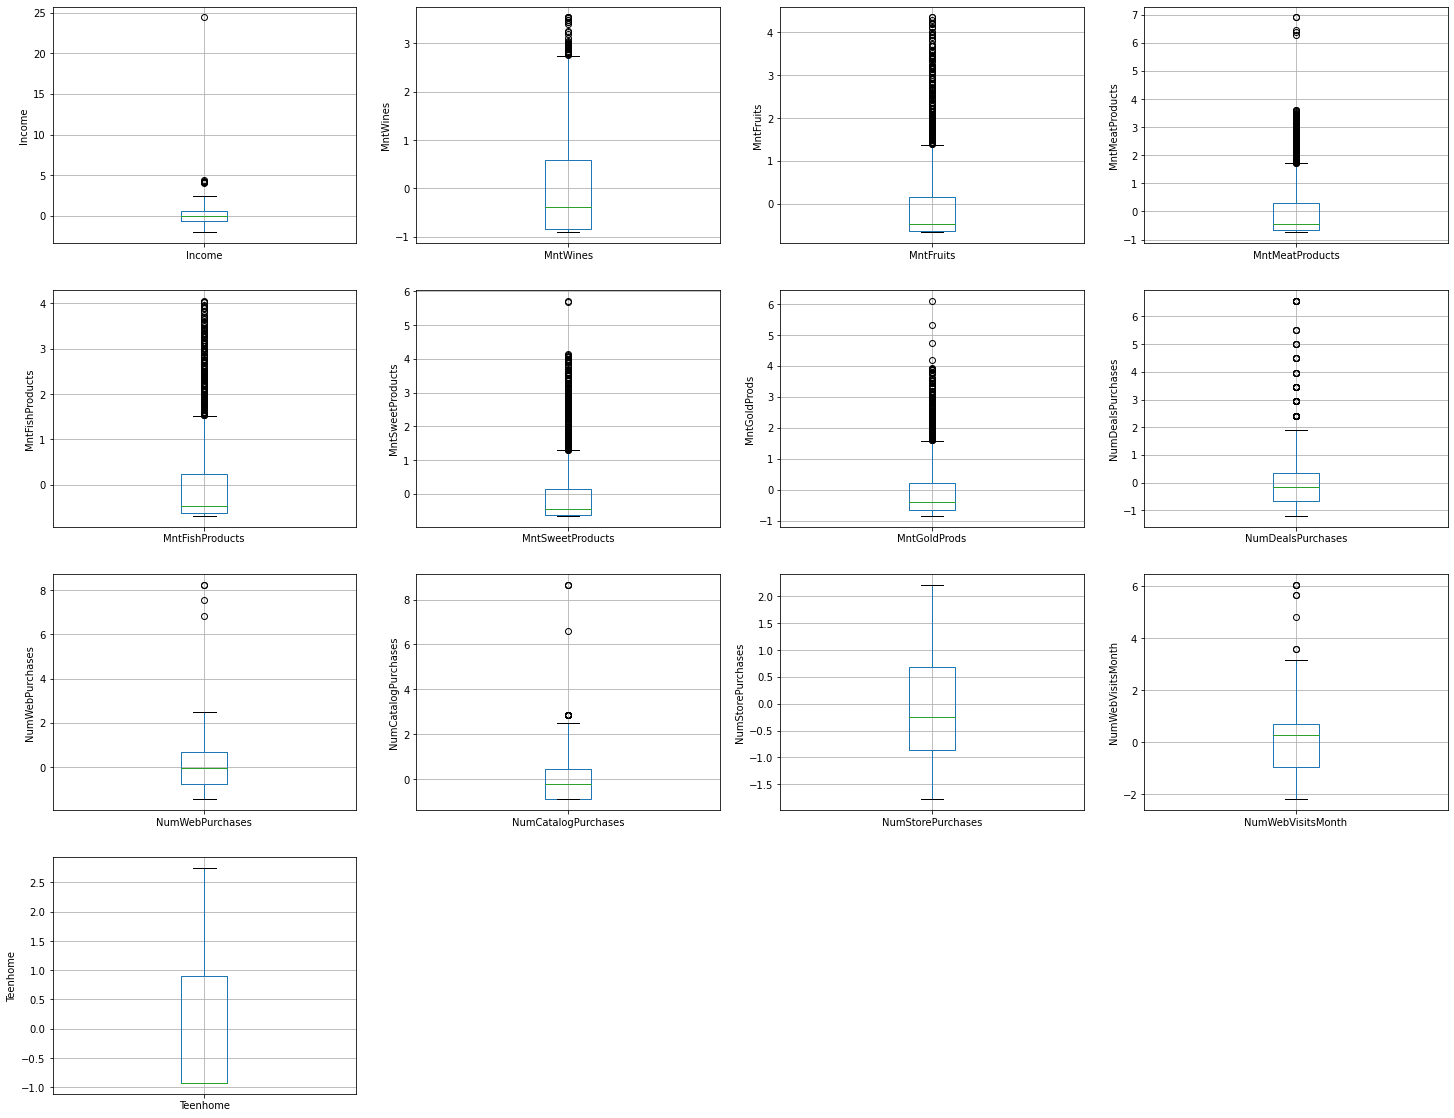

In [30]:
plt.figure(figsize=(25,20))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  fig = ndata.boxplot(column=num_columns[i])
  fig.set_title('')
  fig.set_ylabel(num_columns[i])

#### There are some outliers present in our data.

## Replacing outliers by Median
In this technique, we replace the extreme values with median values. It is advised to not use mean values as they are affected by outliers. 

In [31]:
print(ndata[num_columns].quantile(0.50)) 
print(ndata[num_columns].quantile(0.95)) 
ndata['Income'] = np.where(ndata['Income']>-0.034400,  1.266827 , ndata['Income'])
ndata['MntWines'] = np.where(ndata['MntWines']>-0.387599,  2.068405 , ndata['MntWines'])
ndata['MntFruits'] = np.where(ndata['MntFruits']>-0.460265, 2.431758 , ndata['MntFruits'])
ndata['MntMeatProducts'] = np.where(ndata['MntMeatProducts']>-0.442913,2.304965, ndata['MntMeatProducts'])
ndata['MntFishProducts'] = np.where(ndata['MntFishProducts']>-0.467355,2.389825, ndata['MntFishProducts'])
ndata['MntSweetProducts'] = np.where(ndata['MntSweetProducts']>-0.461894,2.397237 , ndata['MntSweetProducts'])
ndata['MntGoldProds'] = np.where(ndata['MntGoldProds']>-0.383886, 2.320512, ndata['MntGoldProds'])
ndata['NumDealsPurchases'] = np.where(ndata['NumDealsPurchases']>-0.168236,  1.902365, ndata['NumDealsPurchases'])
ndata['NumWebPurchases'] = np.where(ndata['NumWebPurchases']>-0.030532,1.769263 , ndata['NumWebPurchases'])
ndata['NumCatalogPurchases'] = np.where(ndata['NumCatalogPurchases']> -0.226541, 2.168711 , ndata['NumCatalogPurchases'])
ndata['NumStorePurchases'] = np.where(ndata['NumStorePurchases']> -0.243114, 1.910578, ndata['NumStorePurchases'])
ndata['NumWebVisitsMonth'] = np.where(ndata['NumWebVisitsMonth']>  0.281720,  1.106087 , ndata['NumWebVisitsMonth'])

ndata['Teenhome'] = np.where(ndata['Teenhome']>-0.929894,0.906934, ndata['Teenhome'])

Income                -0.034400
MntWines              -0.387599
MntFruits             -0.460265
MntMeatProducts       -0.442913
MntFishProducts       -0.467355
MntSweetProducts      -0.461894
MntGoldProds          -0.383886
NumDealsPurchases     -0.168236
NumWebPurchases       -0.030532
NumCatalogPurchases   -0.226541
NumStorePurchases     -0.243114
NumWebVisitsMonth      0.281720
Teenhome              -0.929894
Name: 0.5, dtype: float64
Income                 1.266827
MntWines               2.068405
MntFruits              2.431758
MntMeatProducts        2.304965
MntFishProducts        2.389825
MntSweetProducts       2.397237
MntGoldProds           2.320512
NumDealsPurchases      1.902365
NumWebPurchases        1.769263
NumCatalogPurchases    2.168711
NumStorePurchases      1.910578
NumWebVisitsMonth      1.106087
Teenhome               0.906934
Name: 0.95, dtype: float64


In [32]:
ndata.shape

(2240, 32)

#####  Box-plot after removing outliers in the present data

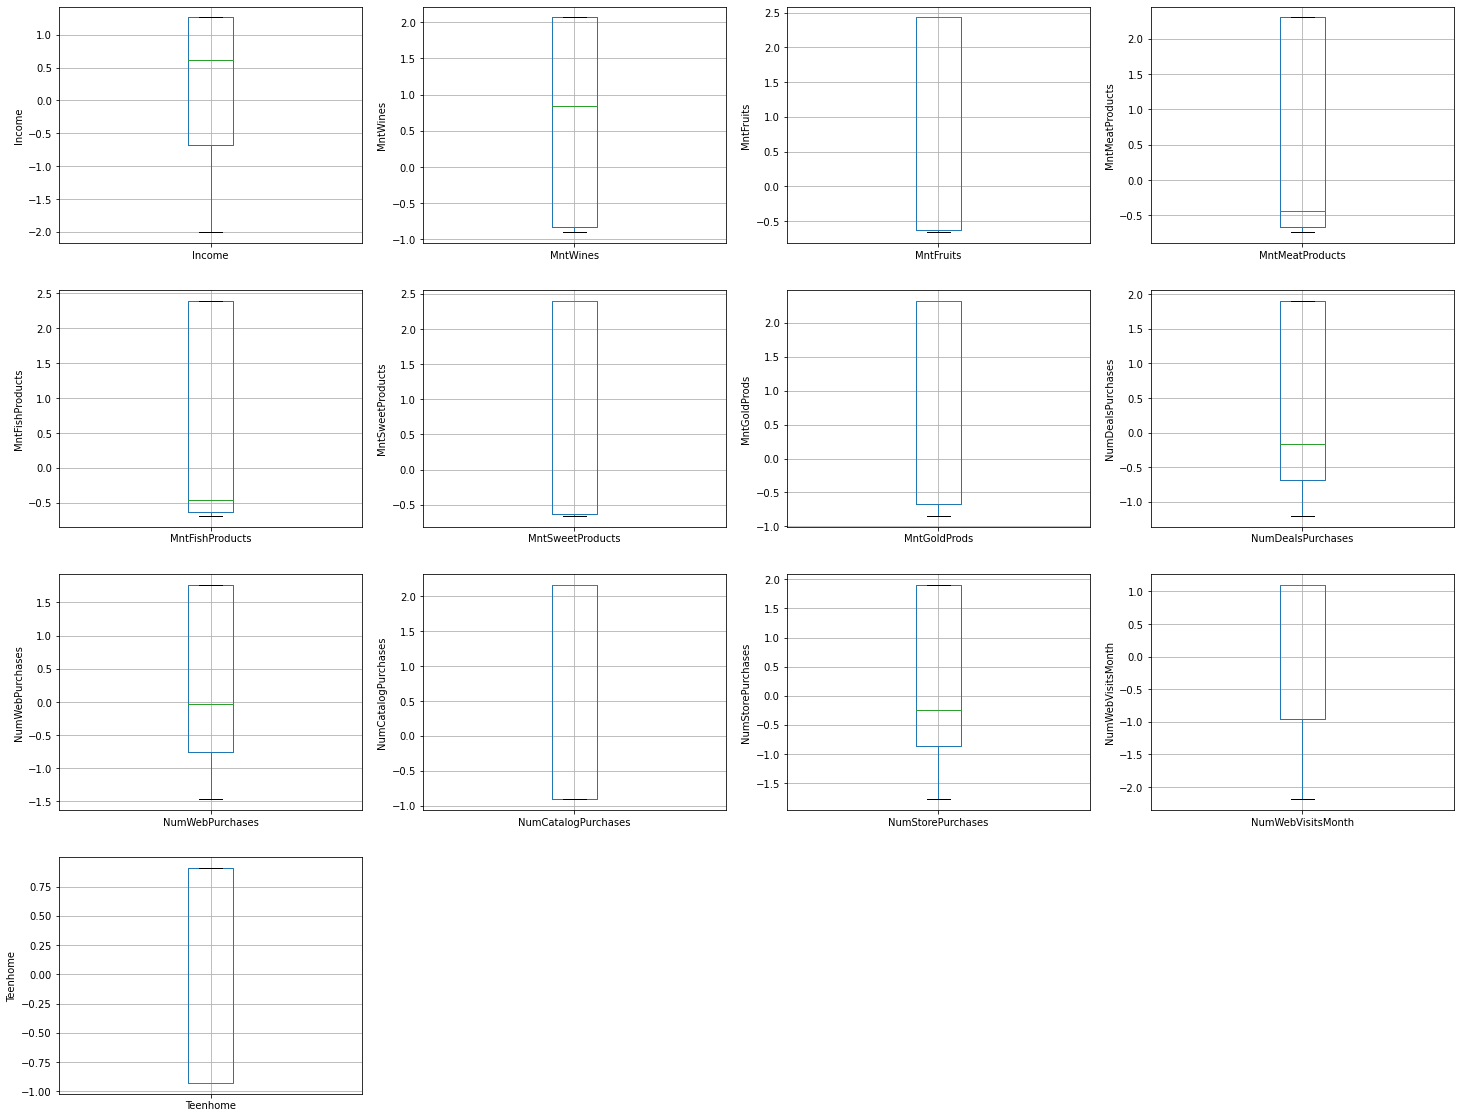

In [33]:
plt.figure(figsize=(25,20)) 
for i in range(len(num_columns)): 
  plt.subplot(4, 4, i+1) 
  fig = ndata.boxplot(column=num_columns[i]) 
  fig.set_title('') 
  fig.set_ylabel(num_columns[i])

## **Data Imputation**

#### Imputation of missing values by mean

In [34]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="mean") 
imputer=imputer.fit(ndata[num_columns])
ndata[num_columns]=imputer.transform(ndata[num_columns])
ndata

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,1.266827,0,-0.929894,58,2.068405,2.431758,2.304965,2.389825,2.397237,...,3,11,1,0,0,0,1,0,0,0
1,2,-0.234559,1,0.906934,38,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,3,11,0,0,0,0,1,0,0,0
2,2,1.266827,0,-0.929894,26,2.068405,2.431758,2.304965,2.389825,2.397237,...,3,11,0,0,0,0,0,1,0,0
3,2,-1.017239,1,-0.929894,26,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,3,11,0,0,0,0,0,1,0,0
4,4,1.266827,1,-0.929894,94,-0.389085,2.431758,2.304965,2.389825,2.397237,...,3,11,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1.266827,0,0.906934,46,2.068405,2.431758,2.304965,2.389825,2.397237,...,3,11,0,0,0,1,0,0,0,0
2236,4,1.266827,2,0.906934,56,2.068405,-0.661449,-0.606873,-0.687068,-0.655733,...,3,11,0,0,0,0,0,1,0,0
2237,2,1.266827,0,-0.929894,91,2.068405,2.431758,2.304965,2.389825,2.397237,...,3,11,0,0,1,0,0,0,0,0
2238,3,1.266827,0,0.906934,8,2.068405,2.431758,2.304965,2.389825,2.397237,...,3,11,0,0,0,0,0,1,0,0


In [35]:
ndata.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Alone                  0
Divorced               0
Married                0
Single                 0
Together               0
Widow                  0
YOLO                   0
dtype: int64

### Findings
**There is no missing values left.**

### Multicollinearity

In [36]:
cndata=ndata.copy()

In [37]:
correlation =cndata[num_columns].corr()
correlation

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Teenhome
Income,1.000000,0.778493,0.507991,0.720139,0.516856,0.486109,0.467049,-0.055910,0.566279,0.754233,0.719364,-0.543805,0.161237
MntWines,0.778493,1.000000,0.516817,0.751961,0.523675,0.492059,0.534576,0.072287,0.709981,0.797902,0.773829,-0.390695,0.087653
MntFruits,0.507991,0.516817,1.000000,0.654805,0.644258,0.638202,0.495518,-0.058147,0.430904,0.606324,0.530378,-0.424828,-0.158689
MntMeatProducts,0.720139,0.751961,0.654805,1.000000,0.671038,0.629685,0.557185,0.024153,0.634434,0.788267,0.730818,-0.457189,-0.050222
MntFishProducts,0.516856,0.523675,0.644258,0.671038,1.000000,0.618428,0.468823,-0.080741,0.425943,0.594271,0.535226,-0.436663,-0.186055
MntSweetProducts,0.486109,0.492059,0.638202,0.629685,0.618428,1.000000,0.473289,-0.020304,0.415697,0.567028,0.529376,-0.404444,-0.158651
MntGoldProds,0.467049,0.534576,0.495518,0.557185,0.468823,0.473289,1.000000,0.091491,0.499071,0.591173,0.482849,-0.238686,-0.007177
NumDealsPurchases,-0.055910,0.072287,-0.058147,0.024153,-0.080741,-0.020304,0.091491,1.000000,0.239979,0.027753,0.078779,0.350655,0.426790
NumWebPurchases,0.566279,0.709981,0.430904,0.634434,0.425943,0.415697,0.499071,0.239979,1.000000,0.595129,0.591702,-0.089449,0.149201
NumCatalogPurchases,0.754233,0.797902,0.606324,0.788267,0.594271,0.567028,0.591173,0.027753,0.595129,1.000000,0.689201,-0.474858,0.023800


In [38]:
for column1 in cndata[num_columns]:
  for column2 in cndata[num_columns]:
    if column1!=column2 and cndata[column1].corr(cndata[column2])>=0.9:
      print(f"{column1} and {column2} are highly correlated")


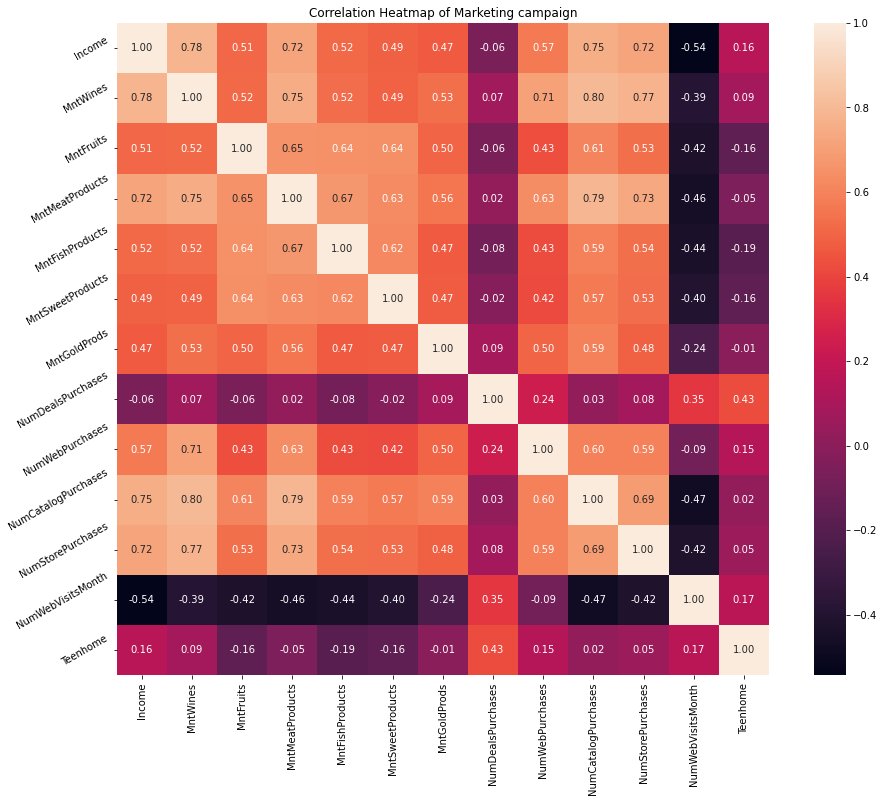

In [39]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Marketing campaign')
ax = sns.heatmap(cndata[num_columns].corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking VIF values.

In [41]:
def vif(Z3):
  vif_data = pd.DataFrame()
  vif_data["feature"] = Z3.columns
  vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
  for i in range(len(Z3.columns))]
  return vif_data

In [42]:
vif_df=vif(cndata[num_columns])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
1,MntWines,5.693785
3,MntMeatProducts,5.529949
9,NumCatalogPurchases,5.257185
0,Income,4.306189
10,NumStorePurchases,3.312221
2,MntFruits,3.140082
4,MntFishProducts,3.017878
5,MntSweetProducts,2.893736
8,NumWebPurchases,2.443291
6,MntGoldProds,2.258905


## Findings
**There are 3 columns(MntWines,MntMeatProducts,NumCatalogPurchases) whose VIF value is greater than 5.**

In [43]:
def vif_func(X,thresh=10):

  var_names=X.columns
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  Y=X
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  vif_max=vif_data['VIF'].max()
  vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
  if(vif_max<=thresh):
    print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
    return var_names
  else:
      while(vif_max>thresh):
        X=X.drop(vif_features_max, inplace=False, axis=1)
        print("\n Dropped Features",list(vif_features_max),"\n Max VIF␣,→was",vif_max)
        var_names=X.columns
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
        for i in range(len(X.columns))]
        vif_max=vif_data['VIF'].max()
        vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
        if(vif_max<=thresh):
          print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
          break
      return X.columns

In [44]:
vif_func(cndata[num_columns],5)[1:]


 Dropped Features ['MntWines'] 
 Max VIF␣,→was 5.693784798341928

 Dropped Features ['MntMeatProducts'] 
 Max VIF␣,→was 5.493333454226097
All Variables have VIF < 5  Max VIF is  4.1952117697488935


Index(['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Teenhome'],
      dtype='object')

#### Dropping of two columns MntWines and MntMeatProducts to reduce multicollinearity.

In [45]:
num_columns=['Income','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds',
            "NumDealsPurchases",'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'Teenhome']
ndata.drop(columns = 'MntWines',axis=1,inplace = True)
ndata.drop(columns = 'MntMeatProducts',axis=1,inplace = True)

In [46]:
def vif(Z3):
  vif_data = pd.DataFrame()
  vif_data["feature"] = Z3.columns
  vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
  for i in range(len(Z3.columns))]
  return vif_data

### VIF values after eliminating two columns

In [47]:
vif_df=vif(cndata[num_columns])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
7,NumCatalogPurchases,4.195212
0,Income,3.952539
1,MntFruits,3.065607
8,NumStorePurchases,2.877751
2,MntFishProducts,2.874222
3,MntSweetProducts,2.833840
4,MntGoldProds,2.249110
6,NumWebPurchases,2.146884
9,NumWebVisitsMonth,1.753698
5,NumDealsPurchases,1.615131


In [48]:
ndata

,Education,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,1.266827,0,-0.929894,58,2.431758,2.389825,2.397237,2.320512,1.902365,...,3,11,1,0,0,0,1,0,0,0
1,2,-0.234559,1,0.906934,38,-0.636301,-0.650449,-0.631503,-0.729006,-0.168236,...,3,11,0,0,0,0,1,0,0,0
2,2,1.266827,0,-0.929894,26,2.431758,2.389825,2.397237,2.320512,-0.685887,...,3,11,0,0,0,0,0,1,0,0
3,2,-1.017239,1,-0.929894,26,-0.560857,-0.503974,-0.583043,-0.748179,-0.168236,...,3,11,0,0,0,0,0,1,0,0
4,4,1.266827,1,-0.929894,94,2.431758,2.389825,2.397237,-0.556446,1.902365,...,3,11,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1.266827,0,0.906934,46,2.431758,2.389825,2.397237,2.320512,-0.168236,...,3,11,0,0,0,1,0,0,0,0
2236,4,1.266827,2,0.906934,56,-0.661449,-0.687068,-0.655733,-0.690659,1.902365,...,3,11,0,0,0,0,0,1,0,0
2237,2,1.266827,0,-0.929894,91,2.431758,2.389825,2.397237,2.320512,-0.685887,...,3,11,0,0,1,0,0,0,0,0
2238,3,1.266827,0,0.906934,8,2.431758,2.389825,2.397237,2.320512,-0.168236,...,3,11,0,0,0,0,0,1,0,0


## Data Imbalancing

In [49]:
ndata['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

## countplot for Response Variable

C:\Users\Shivam\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

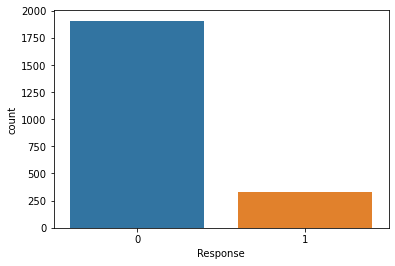

In [50]:
sns.countplot("Response",data=data)

### There are 14.9% of response 1  and rest are response 0.
**This shows our data is imbalanced.**

## **Application of train test split**

In [51]:

ndata

,Education,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Z_CostContact,Z_Revenue,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,2,1.266827,0,-0.929894,58,2.431758,2.389825,2.397237,2.320512,1.902365,...,3,11,1,0,0,0,1,0,0,0
1,2,-0.234559,1,0.906934,38,-0.636301,-0.650449,-0.631503,-0.729006,-0.168236,...,3,11,0,0,0,0,1,0,0,0
2,2,1.266827,0,-0.929894,26,2.431758,2.389825,2.397237,2.320512,-0.685887,...,3,11,0,0,0,0,0,1,0,0
3,2,-1.017239,1,-0.929894,26,-0.560857,-0.503974,-0.583043,-0.748179,-0.168236,...,3,11,0,0,0,0,0,1,0,0
4,4,1.266827,1,-0.929894,94,2.431758,2.389825,2.397237,-0.556446,1.902365,...,3,11,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1.266827,0,0.906934,46,2.431758,2.389825,2.397237,2.320512,-0.168236,...,3,11,0,0,0,1,0,0,0,0
2236,4,1.266827,2,0.906934,56,-0.661449,-0.687068,-0.655733,-0.690659,1.902365,...,3,11,0,0,0,0,0,1,0,0
2237,2,1.266827,0,-0.929894,91,2.431758,2.389825,2.397237,2.320512,-0.685887,...,3,11,0,0,1,0,0,0,0,0
2238,3,1.266827,0,0.906934,8,2.431758,2.389825,2.397237,2.320512,-0.168236,...,3,11,0,0,0,0,0,1,0,0


In [52]:
#selecting regressors by stepwise in R(coding)
x=ndata.drop(["Response"],axis=1)
x=x.drop(["Income"],axis=1)
x=x.drop(["Kidhome"],axis=1)
x=x.drop(["MntFishProducts"],axis=1)
x=x.drop(["MntSweetProducts"],axis=1)
x=x.drop(["Complain"],axis=1)
x=x.drop(["Z_CostContact"],axis=1)
x=x.drop(["Z_Revenue"],axis=1)
x=x.drop(["Divorced"],axis=1)
x=x.drop(["Alone"],axis=1)
x=x.drop(["Single"],axis=1)
x=x.drop(["Widow"],axis=1)
x=x.drop(["YOLO"],axis=1)

In [53]:
x

,Education,Teenhome,Recency,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Married,Together
0,2,-0.929894,58,2.431758,2.320512,1.902365,1.769263,2.168711,-0.550785,1.106087,0,0,0,0,0,0,0
1,2,0.906934,38,-0.636301,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0
2,2,-0.929894,26,2.431758,2.320512,-0.685887,1.769263,2.168711,1.910578,-0.542647,0,0,0,0,0,0,1
3,2,-0.929894,26,-0.560857,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,1.106087,0,0,0,0,0,0,1
4,4,-0.929894,94,2.431758,-0.556446,1.902365,1.769263,2.168711,1.910578,-0.130463,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,0.906934,46,2.431758,2.320512,-0.168236,1.769263,2.168711,-0.550785,-0.130463,0,0,0,0,0,1,0
2236,4,0.906934,56,-0.661449,-0.690659,1.902365,1.769263,2.168711,-0.243114,1.106087,0,0,0,1,0,0,1
2237,2,-0.929894,91,2.431758,2.320512,-0.685887,-0.750450,2.168711,1.910578,1.106087,0,1,0,0,0,0,0
2238,3,0.906934,8,2.431758,2.320512,-0.168236,1.769263,2.168711,1.910578,-0.954831,0,0,0,0,0,0,1


In [54]:
#x=ndata['Education','Teenhome','MntFruits','NumWebPurchases' ,'NumWebVisitsMonth','AcceptedCmp5','MntGoldProds','Married','NumCatalogPurchases','AcceptedCmp3','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Together','Recency','NumDealsPurchases','NumStorePurchases']
y=ndata["Response"]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [56]:
print(x.shape,x_train.shape,x_test.shape)

(2240, 17) (2016, 17) (224, 17)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
logmodel=LogisticRegression()
from sklearn.metrics import roc_curve,roc_auc_score

In [58]:
logmodel.fit(x_train,y_train)

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=logmodel.predict(x_test)

0.8973214285714286
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       182
           1       0.91      0.50      0.65        42

    accuracy                           0.90       224
   macro avg       0.90      0.74      0.79       224
weighted avg       0.90      0.90      0.88       224



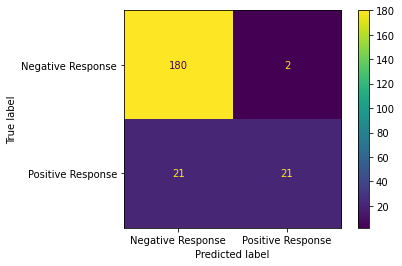

In [60]:
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Negative Response','Positive Response'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


## **Oversampling**

In [61]:
from collections import Counter
Counter(y_train)
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
x_train_os,y_train_os=os.fit_resample(x_train,y_train)
print(" The number of classes before fit{}".format(Counter(y_train)))
print(" The number of classes after fit{}".format(Counter(y_train_os)))

 The number of classes before fitCounter({0: 1724, 1: 292})
 The number of classes after fitCounter({0: 1724, 1: 862})


C:\Users\Shivam\anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0.875
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       182
           1       0.67      0.67      0.67        42

    accuracy                           0.88       224
   macro avg       0.79      0.79      0.79       224
weighted avg       0.88      0.88      0.88       224



C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


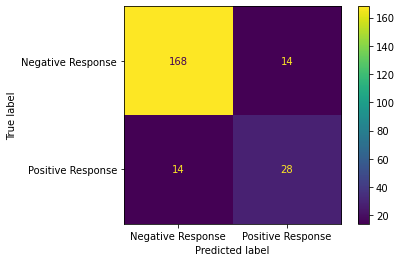

In [62]:
logmodel.fit(x_train_os,y_train_os)
y_pred=logmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Negative Response','Positive Response'])
cmd.plot()
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (3448, 17)
After OverSampling, the shape of train_y: (3448,) 

After OverSampling, counts of label '1': 1724
After OverSampling, counts of label '0': 1724


0.8125
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       182
           1       0.50      0.71      0.59        42

    accuracy                           0.81       224
   macro avg       0.71      0.77      0.73       224
weighted avg       0.85      0.81      0.82       224



C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


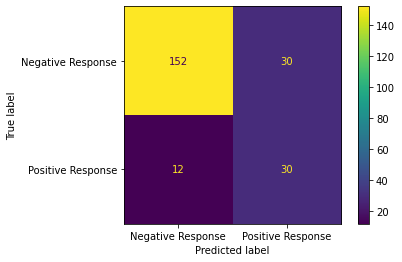

In [64]:
logmodel.fit(x_train_res,y_train_res)
y_pred=logmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Negative Response','Positive Response'])
cmd.plot() 
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


## **MODEL FITTING**

### Logistic Model

In [65]:
logmodel1=LogisticRegression()
logmodel1.fit(x_train_os,y_train_os)
y_pred_logistic=logmodel.predict(x_test)
print(accuracy_score(y_test,y_pred_logistic))

C:\Users\Shivam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8125


### ROC accuracy score

In [66]:
auc = roc_auc_score(y_test,y_pred_logistic)
print('AUC for Logistic Regression: %.2f' % auc)

AUC for Logistic Regression: 0.77


### ROC curve

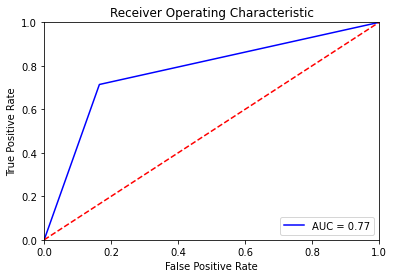

In [67]:
import sklearn.metrics as metrics
probs = logmodel1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_logistic )
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Classification report

In [68]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       182
           1       0.50      0.71      0.59        42

    accuracy                           0.81       224
   macro avg       0.71      0.77      0.73       224
weighted avg       0.85      0.81      0.82       224



### Confusion Matrix 

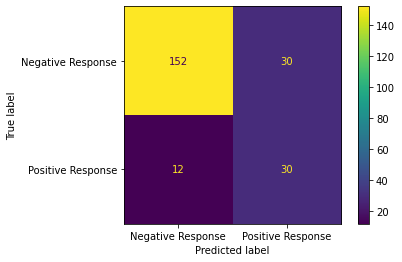

In [69]:
cm=confusion_matrix(y_test,y_pred_logistic)
cmd=ConfusionMatrixDisplay(cm,display_labels=['Negative Response','Positive Response'])
cmd.plot()

In [70]:
def vif(Z3):
  vif_data = pd.DataFrame()
  vif_data["feature"] = Z3.columns
  vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
  for i in range(len(Z3.columns))]
  return vif_data

In [71]:

x.columns

Index(['Education', 'Teenhome', 'Recency', 'MntFruits', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Married', 'Together'],
      dtype='object')

In [72]:
col=['Education', 'Teenhome', 'Recency', 'MntFruits', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Married', 'Together']

#### VIF Values after variable selection 

In [73]:
vif_df=vif(x[col])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
7,NumCatalogPurchases,3.874586
0,Education,3.287817
2,Recency,3.022487
8,NumStorePurchases,2.606598
3,MntFruits,2.542208
4,MntGoldProds,2.305133
6,NumWebPurchases,2.190596
9,NumWebVisitsMonth,1.852984
15,Married,1.814799
5,NumDealsPurchases,1.571800
